1. Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Step1: Read the dataset

In [2]:
df=pd.read_excel('ht_wt.xlsx')
df

FileNotFoundError: [Errno 2] No such file or directory: 'ht_wt.xlsx'

In [ ]:
from scipy import stats


Step2: EDA

Step3:FE

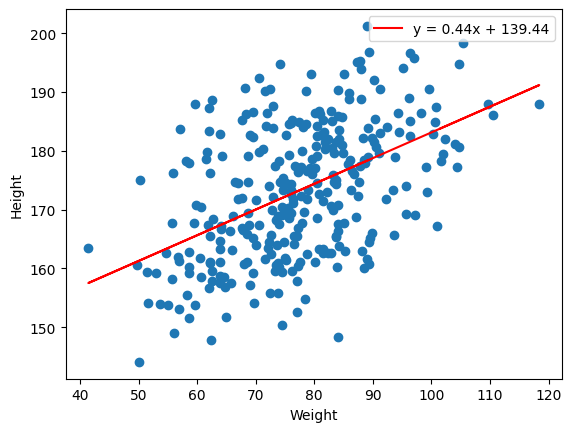

In [ ]:
# visualizations
plt.scatter(df['Weight'], df['Height']);
plt.xlabel('Weight');
plt.ylabel('Height');
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Weight'], df['Height'])
regression_line = f"y = {slope:.2f}x + {intercept:.2f}"

# Create an array of x values for the line of best fit
x_values = np.array(df['Weight'])
y_values = slope * x_values + intercept

# Plot the regression line
plt.plot(x_values, y_values, color='red', label=regression_line)

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


In [ ]:
df.describe()

,Weight,Height
count,300.000000,300.000000
mean,77.223214,173.176814
std,12.777331,11.430177
min,41.410015,144.121188
25%,68.618314,163.736028
50%,77.045618,173.267355
75%,84.941510,182.392769
max,118.415956,201.229989


Step 4 : Divide the dataset into Independent and dependent Features

In [ ]:
X=df[['Weight']]
Y=df['Height']

Step5: Further Divide the dataset into train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [ ]:
X_train.shape, X_test.shape

((210, 1), (90, 1))

Step 6:-Apply Standard Scaling reason to converge my model sooner

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_sc=scaler.fit_transform(X_train)

In [ ]:
X_test_sc=scaler.transform(X_test)

# Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR=LinearRegression()

In [ ]:
LR.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
LR.intercept_, LR.coef_

(173.32329872301065, array([5.67733724]))

In [ ]:
y_pred=LR.predict(X_test_sc)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
print("mse: ", mean_squared_error(y_test, y_pred))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("r2_score: ", r2_score(y_test, y_pred))

mse:  119.25272066176525
mae:  8.687976899559455
r2_score:  0.19030640694611034


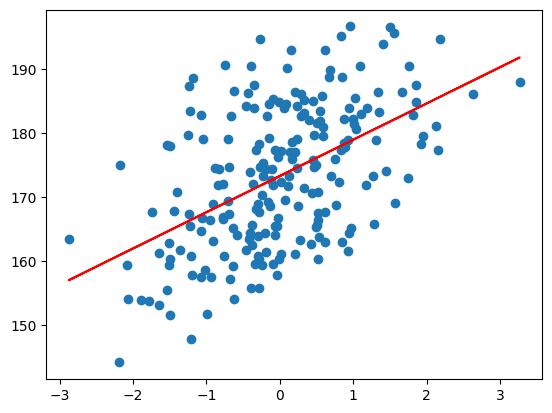

In [ ]:
plt.scatter(X_train_sc,y_train)
plt.plot(X_train_sc, LR.predict(X_train_sc), 'r')

# Prediction of train_data

1. predicted_train_output= intercept + coef_(Weights)
2. y_pred_train= 173.32 +5.67(X_train_sc)

Prediction of test_data

1. predicted_test_output= intercept + coef_(Weights)
2. y_pred_train= 173.32 +5.67(X_test_sc)

2. Multiple Linear Regression

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
import seaborn as sns

In [ ]:
california=fetch_california_housing()

In [ ]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# Lets prepare the dataset
dataset=pd.DataFrame(california.data, columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
dataset['Price']=california.target

In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
dataset.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
# pearson correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

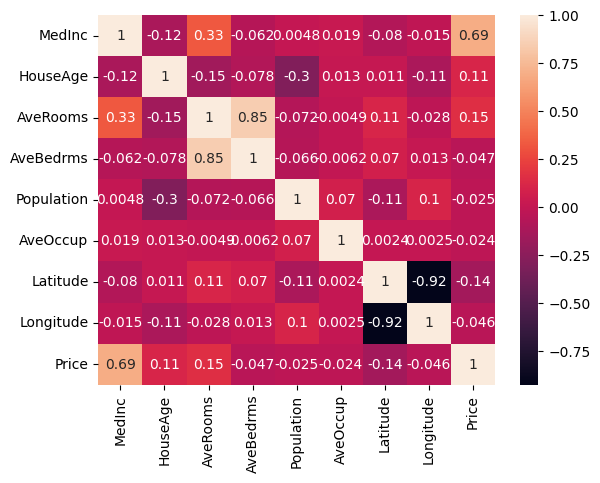

In [ ]:
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
# independent and Dependendent features
X=dataset.iloc[:,:-1] # independent features
y=dataset.iloc[:,-1]  # dependent features

In [ ]:
X_tr, X_te, y_tr, y_te=train_test_split(X,y,test_size=0.33,random_state=10)

In [ ]:
X_tr.shape,y_tr.shape, X_te.shape,y_te.shape

((13828, 8), (13828,), (6812, 8), (6812,))

In [ ]:
X_tr_sc=scaler.fit_transform(X_tr)

In [ ]:
X_te_sc=scaler.transform(X_te)

In [ ]:
X_te.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20303,5.2783,12.0,4.466019,0.980583,405.0,3.932039,34.16,-119.18
16966,3.9722,27.0,4.619271,1.096357,1877.0,2.205640,37.55,-122.31
10623,4.5094,12.0,4.426380,1.092025,1913.0,1.956033,33.67,-117.77
6146,3.1034,29.0,4.597222,1.037037,2013.0,4.659722,34.11,-117.95
2208,4.6726,6.0,5.730303,1.033333,969.0,2.936364,36.81,-119.87


In [ ]:
X_te_sc

array([[ 0.72001994, -1.33834012, -0.3808301 , ...,  0.05415325,
        -0.69097771,  0.19369097],
       [ 0.04168615, -0.1391224 , -0.32097575, ..., -0.06041412,
         0.90514586, -1.37333746],
       [ 0.32068539, -1.33834012, -0.39631158, ..., -0.0769786 ,
        -0.92168584,  0.89960474],
       ...,
       [ 0.34104424,  0.26061684,  0.03297221, ..., -0.04177659,
        -0.46968624, -0.44213206],
       [-0.90250711, -0.93860088,  0.62643804, ..., -0.05223908,
         2.53422773, -1.97912161],
       [-0.44157668,  1.21999102, -0.43265217, ...,  0.12609141,
        -0.74747766,  0.69433904]])

In [ ]:
LR.fit(X_tr_sc, y_tr)

LinearRegression()

In [ ]:
LR.intercept_, LR.coef_

(2.0634768086491184,
 array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
        -0.02810091, -0.93017985, -0.89505497]))

In [ ]:
y_pre=LR.predict(X_te_sc)

In [ ]:
print("mse: ", mean_squared_error(y_te, y_pre))
print("mae: ", mean_absolute_error(y_te, y_pre))
print("r2_score: ", r2_score(y_te, y_pre))

mse:  0.5445844745633521
mae:  0.5372372970472844
r2_score:  0.5992247966204969


In [ ]:
score= r2_score(y_te, y_pre)

In [ ]:
# Adjusted R-square
adjusted_r_squared = 1 - (1 - score) * (len(y_te) - 1) / (len(y_te) - X_te_sc.shape[1] - 1)
print(adjusted_r_squared)

0.5987535043043075


# Pickling
Python pickle module is used for serialising and deserializing a Python object structure. Any object in Python can be pickled so that it can saved on disk. What pickle does is that it "serialize" the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [ ]:
import pickle

pickle.dump(LR, open('LR.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
model_regressor=pickle.load(open('LR.pkl', 'rb'))
model_scaler=pickle.load(open('scaler.pkl', 'rb'))

In [ ]:
x_new = pd.DataFrame({
    'MedInc': [5.2783, 3.9722, 4.5094, 3.1034, 4.6726],
    'HouseAge': [12.0, 27.0, 12.0, 29.0, 6.0],
    'AveRooms': [4.466019, 4.619271, 4.426380, 4.597222, 5.730303],
    'AveBedrms': [0.980583, 1.096357, 1.092025, 1.037037, 1.033333],
    'Population': [405.0, 1877.0, 1913.0, 2013.0, 969.0],
    'AveOccup': [3.932039, 2.205640, 1.956033, 4.659722, 2.936364],
    'Latitude': [34.16, 37.55, 33.67, 34.11, 36.81],
    'Longitude': [-119.18, -122.31, -117.77, -117.95, -119.87]
})

In [ ]:
x_new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2783,12.0,4.466019,0.980583,405.0,3.932039,34.16,-119.18
1,3.9722,27.0,4.619271,1.096357,1877.0,2.205640,37.55,-122.31
2,4.5094,12.0,4.426380,1.092025,1913.0,1.956033,33.67,-117.77
3,3.1034,29.0,4.597222,1.037037,2013.0,4.659722,34.11,-117.95
4,4.6726,6.0,5.730303,1.033333,969.0,2.936364,36.81,-119.87


In [ ]:
model_scaler.transform(x_new)

array([[ 7.20019939e-01, -1.33834012e+00, -3.80830259e-01,
        -2.14040857e-01, -9.13255653e-01,  5.41532583e-02,
        -6.90977709e-01,  1.93690975e-01],
       [ 4.16861527e-02, -1.39122400e-01, -3.20975927e-01,
         4.33224450e-04,  4.05211841e-01, -6.04141451e-02,
         9.05145860e-01, -1.37333746e+00],
       [ 3.20685395e-01, -1.33834012e+00, -3.96311727e-01,
        -7.59190832e-03,  4.37456970e-01, -7.69785812e-02,
        -9.21685836e-01,  8.99604741e-01],
       [-4.09532279e-01,  2.07732958e-02, -3.29587418e-01,
        -1.09458483e-01,  5.27026773e-01,  1.02443805e-01,
        -7.14519355e-01,  8.09488090e-01],
       [ 4.05444658e-01, -1.81802721e+00,  1.12950405e-01,
        -1.16320231e-01, -4.08081967e-01, -1.19217912e-02,
         5.56729505e-01, -1.51756187e-01]])

In [ ]:
model_regressor.predict(x_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([82.68061746, 86.28203247, 84.56071601, 85.313622  , 80.5002066 ])